In [137]:
from sympy import *

In [138]:
q_n14, q_n12, q_n1, q_n34, q_n, a, h, M = symbols("q^{(n+1/4)} q^{(n+1/2)} q^{(n+1)} q^{(n+3/4)} q^{(n)} a h M")
f_n, f_n1, eps, eps_, theta_n, theta_n1 = symbols(r"f^{(n)} f^{(n+1)} \epsilon \epsilon' \theta^{(n)} \theta^{(n+1)}")
alpha, C, T = symbols(r"\alpha C T")
x, x_ = symbols("x x'")

In [139]:
vel1 = sqrt(a)*q_n + Rational(1, 2)*C*f_n + alpha*eps
vel1

C*f^{(n)}/2 + \alpha*\epsilon + sqrt(a)*q^{(n)}

In [140]:
pos1 = theta_n + C*q_n12
pos1

C*q^{(n+1/2)} + \theta^{(n)}

In [141]:
vel2 = sqrt(a)*q_n12 + Rational(1, 2)*sqrt(a)*C*f_n1 + alpha*eps_
vel2

C*sqrt(a)*f^{(n+1)}/2 + \alpha*\epsilon' + sqrt(a)*q^{(n+1/2)}

In [142]:
C_def =  h/sqrt(M)
alpha_def = sqrt((1-a)*T)

In [143]:
vel1_expanded = vel1.subs(C, C_def).subs(alpha, alpha_def)
vel1_expanded

\epsilon*sqrt(T*(1 - a)) + sqrt(a)*q^{(n)} + f^{(n)}*h/(2*sqrt(M))

In [144]:
pos1.subs(C, C_def)

\theta^{(n)} + h*q^{(n+1/2)}/sqrt(M)

In [145]:
vel2_expanded = vel2.subs(C, C_def).subs(alpha, alpha_def)
vel2_expanded

\epsilon'*sqrt(T*(1 - a)) + sqrt(a)*q^{(n+1/2)} + sqrt(a)*f^{(n+1)}*h/(2*sqrt(M))

In [146]:
expand(simplify(vel1_expanded.subs(q_n, vel2_expanded).subs(f_n, f_n1)))

\epsilon*sqrt(-T*a + T) + \epsilon'*sqrt(a)*sqrt(-T*a + T) + a*q^{(n+1/2)} + a*f^{(n+1)}*h/(2*sqrt(M)) + f^{(n+1)}*h/(2*sqrt(M))

In [147]:
solution = linsolve([
    Eq(theta_n1, pos1.subs(q_n12, vel1)),
    Eq(q_n1, vel2.subs(q_n12, vel1))],
    [eps, eps_])

In [148]:
eps_def, eps__def = next(iter(solution))
eps_def

(-C**2*f^{(n)}/2 - C*sqrt(a)*q^{(n)} - \theta^{(n)} + \theta^{(n+1)})/(C*\alpha)

In [149]:
c_2 = symbols("c_2")
alpha_def_c_2 = c_2 / sqrt(M)

eps_def_alt = expand(eps_def).subs(C*alpha, simplify(alpha_def_c_2 * C_def))\
                        .subs(alpha, alpha_def_c_2).subs(C, C_def)
eps_def_alt

-sqrt(M)*sqrt(a)*q^{(n)}/c_2 - M*\theta^{(n)}/(c_2*h) + M*\theta^{(n+1)}/(c_2*h) - f^{(n)}*h/(2*c_2)

In [150]:
eps__def_alt = -expand(eps__def).subs(C*alpha, simplify(alpha_def_c_2 * C_def))\
                        .subs(alpha, alpha_def_c_2).subs(C, C_def)
eps__def_alt

-sqrt(M)*q^{(n+1)}/c_2 - M*\theta^{(n)}*sqrt(a)/(c_2*h) + M*\theta^{(n+1)}*sqrt(a)/(c_2*h) + sqrt(a)*f^{(n+1)}*h/(2*c_2)

In [151]:
log_density1 = -Rational(1, 2)*(eps_def_alt**2 + eps__def_alt**2)
log_density1
simplify(simplify((log_density1)*T).subs(c_2**2, (1-a)*M*T))

((2*M*(\theta^{(n)} - \theta^{(n+1)}) + h*(2*sqrt(M)*sqrt(a)*q^{(n)} + f^{(n)}*h))**2 + (2*M*sqrt(a)*(\theta^{(n)} - \theta^{(n+1)}) + h*(2*sqrt(M)*q^{(n+1)} - sqrt(a)*f^{(n+1)}*h))**2)/(8*M*h**2*(a - 1))

In [152]:
tmp = symbols('\text{tmp}')
log_density2 = (log_density1
                .subs(f_n, tmp).subs(f_n1, f_n).subs(tmp, f_n1)
                .subs(theta_n, tmp).subs(theta_n1, theta_n).subs(tmp, theta_n1)
                .subs(q_n, tmp).subs(q_n1, -q_n).subs(tmp, -q_n1))
simplify(simplify((log_density2)*T).subs(c_2**2, (1-a)*M*T))

((2*M*(\theta^{(n)} - \theta^{(n+1)}) + h*(2*sqrt(M)*sqrt(a)*q^{(n+1)} - f^{(n+1)}*h))**2 + (2*M*sqrt(a)*(\theta^{(n)} - \theta^{(n+1)}) + h*(2*sqrt(M)*q^{(n)} + sqrt(a)*f^{(n)}*h))**2)/(8*M*h**2*(a - 1))

In [153]:
x = simplify(simplify((log_density1 - log_density2)*T).subs(c_2**2, (1-a)*M*T))

In [154]:
x

-\theta^{(n)}*f^{(n)}/2 - \theta^{(n)}*f^{(n+1)}/2 + \theta^{(n+1)}*f^{(n)}/2 + \theta^{(n+1)}*f^{(n+1)}/2 + q^{(n)}**2/2 - q^{(n+1)}**2/2 - f^{(n)}**2*h**2/(8*M) + f^{(n+1)}**2*h**2/(8*M)

# SGLD version

In [34]:
ld1_sgld = log_density1.subs(a, 0)
ld1_sgld

-M*q^{(n+1)}**2/(2*c_2**2) - (-M*\theta^{(n)}/(c_2*h) + M*\theta^{(n+1)}/(c_2*h) - f^{(n)}*h/(2*c_2))**2/2

In [35]:
ld2_sgld = log_density2.subs(a, 0)
ld2_sgld

-M*q^{(n)}**2/(2*c_2**2) - (M*\theta^{(n)}/(c_2*h) - M*\theta^{(n+1)}/(c_2*h) - f^{(n+1)}*h/(2*c_2))**2/2

In [36]:
x = expand(expand((ld1_sgld - ld2_sgld)*T).subs(c_2**2, M*T))
x

-\theta^{(n)}*f^{(n)}/2 - \theta^{(n)}*f^{(n+1)}/2 + \theta^{(n+1)}*f^{(n)}/2 + \theta^{(n+1)}*f^{(n+1)}/2 + q^{(n)}**2/2 - q^{(n+1)}**2/2 - f^{(n)}**2*h**2/(8*M) + f^{(n+1)}**2*h**2/(8*M)

In [37]:
ld1_sgld = -Rational(1, 4)/h**2 * (theta_n1 - theta_n - h**2 * f_n)**2
ld1_sgld

-(-\theta^{(n)} + \theta^{(n+1)} - f^{(n)}*h**2)**2/(4*h**2)

In [38]:
ld2_sgld = (ld1_sgld
                .subs(f_n, tmp).subs(f_n1, f_n).subs(tmp, f_n1)
                .subs(theta_n, tmp).subs(theta_n1, theta_n).subs(tmp, theta_n1)
                .subs(q_n, tmp).subs(q_n1, -q_n).subs(tmp, -q_n1))
ld2_sgld

-(\theta^{(n)} - \theta^{(n+1)} - f^{(n+1)}*h**2)**2/(4*h**2)

In [52]:
x = simplify(expand((ld1_sgld - ld2_sgld)).subs(c_2**2, M*T))
x

-\theta^{(n)}*f^{(n)}/2 - \theta^{(n)}*f^{(n+1)}/2 + \theta^{(n+1)}*f^{(n)}/2 + \theta^{(n+1)}*f^{(n+1)}/2 - f^{(n)}**2*h**2/4 + f^{(n+1)}**2*h**2/4

# Compare SGLD with HMC

In [31]:
q_n_def = (q_n12 -  C/2*f_n - alpha*eps) / sqrt(a)
assert vel1.subs(q_n, q_n_def) == q_n12
q_n_def

(-C*f^{(n)}/2 - \alpha*\epsilon + q^{(n+1/2)})/sqrt(a)

In [88]:
q_n12_from_n1 = (q_n1 -  C*sqrt(a)/2*f_n1 - alpha*eps_) / sqrt(a)
assert vel2.subs(q_n12, q_n12_from_n1) == q_n1
q_n12_from_n1

(-C*sqrt(a)*f^{(n+1)}/2 - \alpha*\epsilon' + q^{(n+1)})/sqrt(a)

In [44]:
f_n_def = 2/C * (q_n12 - sqrt(a)*q_n - alpha*eps)
assert vel1.subs(f_n, f_n_def) == q_n12
f_n_def

2*(-\alpha*\epsilon - sqrt(a)*q^{(n)} + q^{(n+1/2)})/C

In [45]:
f_n1_def = 2/(C * sqrt(a)) * (q_n1 - sqrt(a)*q_n12 - alpha*eps_)
assert vel2.subs(f_n1, f_n1_def) == q_n1
f_n1_def

2*(-\alpha*\epsilon' - sqrt(a)*q^{(n+1/2)} + q^{(n+1)})/(C*sqrt(a))

In [60]:
y = simplify(collect(collect(x.subs(f_n, f_n_def).subs(f_n1, f_n1_def), theta_n), theta_n1))
y

(C*a*(\theta^{(n)} - \theta^{(n+1)})*(\alpha*\epsilon' + sqrt(a)*q^{(n+1/2)} + sqrt(a)*(\alpha*\epsilon + sqrt(a)*q^{(n)} - q^{(n+1/2)}) - q^{(n+1)}) - a**(3/2)*h**2*(\alpha*\epsilon + sqrt(a)*q^{(n)} - q^{(n+1/2)})**2 + sqrt(a)*h**2*(\alpha*\epsilon' + sqrt(a)*q^{(n+1/2)} - q^{(n+1)})**2)/(C**2*a**(3/2))

In [93]:
eps_def_q = eps_def.subs(theta_n - theta_n1, -C*q_n12)
eps__def_q = eps__def.subs(sqrt(a)*theta_n - sqrt(a)*theta_n1, -C*sqrt(a)*q_n12)

z = simplify(expand(y.subs(theta_n - theta_n1, -C*q_n12).subs(eps, eps_def_q).subs(eps_, eps__def_q)))
z

C*f^{(n)}*q^{(n+1/2)}/2 + C*f^{(n+1)}*q^{(n+1/2)}/2 - f^{(n)}**2*h**2/4 + f^{(n+1)}**2*h**2/4

In [94]:
C_def

h/sqrt(M)

In [99]:
expand(expand(z.subs(f_n*q_n12, f_n*vel1).subs(f_n1*q_n12, f_n1*q_n12_from_n1)).subs(C, h).subs(f_n, f_n_def).subs(f_n1, f_n1_def)).subs(C, h)

-\alpha**2*\epsilon**2 + \alpha**2*\epsilon'**2/a - 2*\alpha*\epsilon*sqrt(a)*q^{(n)} + \alpha*\epsilon*q^{(n+1/2)} - 2*\alpha*\epsilon'*q^{(n+1)}/a + \alpha*\epsilon'*q^{(n+1/2)}/sqrt(a) + sqrt(a)*q^{(n)}*q^{(n+1/2)} - a*q^{(n)}**2 + q^{(n+1)}**2/a - q^{(n+1)}*q^{(n+1/2)}/sqrt(a)

In [75]:
eps_def_q = eps_def.subs(theta_n - theta_n1, -C*q_n12)
eps__def_q = eps__def.subs(sqrt(a)*theta_n - sqrt(a)*theta_n1, -C*sqrt(a)*q_n12)

eps__def_q

(-C**2*sqrt(a)*f^{(n+1)}/2 - C*sqrt(a)*q^{(n+1/2)} + C*q^{(n+1)})/(C*\alpha)

In [114]:
collect(collect(expand((x_ - sqrt(a)*x)**2 - (x - sqrt(a)*x_)**2), x), x_)

x**2*(a - 1) + x'**2*(1 - a)

/scratches/huygens/ag919/venv/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/scratches/huygens/ag919/venv/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


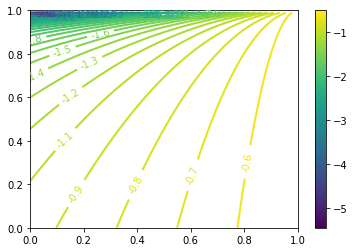

In [134]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.meshgrid(*[np.linspace(0.01, 1, 100)]*2)
Z = -(1 - x)/(2* (1 - y)**.5) - 1/2

#image = plt.imshow(Z, origin='lower', extent=(0, 1, 0, 1))

cset = plt.contour(Z,np.linspace(-6., -.5, 50),linewidths=2,  extent=(0, 1, 0, 1))
plt.clabel(cset,inline=True,fmt='%1.1f',fontsize=10) 


plt.colorbar(image)

In [116]:
np.meshgrid(np.linspace(0, 1, 2), np.linspace(0, 1, 2))

[array([[0., 1.],
        [0., 1.]]),
 array([[0., 0.],
        [1., 1.]])]

In [124]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

ZeroDivisionError: float division by zero

# what is the acceptance ratio of momentum refreshment?

In [155]:
logp_fwd = (q_n14 - q_n*sqrt(a))**2 / (-2 * (1-a) * T)
logp_fwd

(-sqrt(a)*q^{(n)} + q^{(n+1/4)})**2/(T*(2*a - 2))

In [156]:
logp_bak = (logp_fwd
            .subs(q_n14, tmp).subs(q_n, q_n14).subs(tmp, q_n))
logp_bak

(-sqrt(a)*q^{(n+1/4)} + q^{(n)})**2/(T*(2*a - 2))

In [157]:
simplify(logp_fwd - logp_bak)

(q^{(n)}**2 - q^{(n+1/4)}**2)/(2*T)

In [158]:
expand(simplify(((q_n34**2 - q_n14**2) / (2*T))\
.subs(q_n14, sqrt(a)*q_n + alpha*eps_def)\
.subs(q_n34, (q_n1-alpha*eps__def) / sqrt(a))\
.subs(alpha, alpha_def)\
.subs(C, C_def)))

-\theta^{(n)}*f^{(n)}/(2*T) - \theta^{(n)}*f^{(n+1)}/(2*T) + \theta^{(n+1)}*f^{(n)}/(2*T) + \theta^{(n+1)}*f^{(n+1)}/(2*T) - f^{(n)}**2*h**2/(8*M*T) + f^{(n+1)}**2*h**2/(8*M*T)

In [56]:
expand(simplify(((q_n34**2 - q_n14**2) / (2*T))\
.subs(q_n14, sqrt(a)*q_n + alpha*eps)\
.subs(q_n34, (q_n1-alpha*eps_) / sqrt(a))\
.subs(alpha, alpha_def)\
.subs(C, C_def)))

\epsilon**2*a/2 - \epsilon**2/2 - \epsilon'**2/2 + \epsilon'**2/(2*a) - \epsilon*sqrt(a)*q^{(n)}*sqrt(-T*a + T)/T - \epsilon'*q^{(n+1)}*sqrt(-T*a + T)/(T*a) - a*q^{(n)}**2/(2*T) + q^{(n+1)}**2/(2*T*a)